In [404]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [405]:
park = pd.read_csv('./data/서울시 주요 공원현황.csv', encoding='euc-kr')[['공원명','면적','지역','공원주소','X좌표(WGS84)','Y좌표(WGS84)']]
park

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
127,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077
130,율현공원,157535㎡,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332


In [406]:
#데이터 전처리과정

In [407]:
#데이터 타입 분석
park.dtypes

공원명            object
면적             object
지역             object
공원주소           object
X좌표(WGS84)    float64
Y좌표(WGS84)    float64
dtype: object

In [408]:
#면적값 없는것 확인
#nan_raw1 = park.isnull() : 전체 모두 확인
park['면적'].isnull().values.any() 

True

In [409]:
#면적의 값이 없는것은 3개가 나온다.
park['면적'].isnull().sum()

3

In [410]:
nan_raw = park[park['면적'].isnull()]
nan_raw

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
109,푸른수목원,NaN,구로구,서울특별시 구로구 연동로 240(항동81-1) 푸른수목원관리사무소,126.824070,37.483029
119,문화역 서울284,NaN,중구,서울특별시 중구 통일로 1 서울역,126.971592,37.555872
131,서울로7017,NaN,중구,서울로7017,NaN,NaN


In [411]:
park.drop([109],inplace=True)
park.drop([119],inplace=True)
park.drop([131],inplace=True)
park

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
126,서일대뒷산공원,631021㎡,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [412]:
#다시 확인 : 잘 지워졌는지.
park['면적'].isnull().values.any() 

False

In [413]:
#설명만 있는 6행을 제거
park.drop([6], inplace=True)
park

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683㎡,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690m²,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994㎡,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085㎡,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
126,서일대뒷산공원,631021㎡,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [414]:
#면적에 m3 가 있는것 찾아서 park 데이타프레임에 병합하자
park1 = park.loc[park['면적'].str.contains('㎥', na=False)]
park1

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
7,중마루근린공원,6456㎥,영등포구,서울특별시 영등포구 영등포동2가 222,126.911267,37.519832
8,응봉공원,80309㎡ 배수지 시설용량 : 201.000㎥ 송수 펌프용량 : 직송급수계통 30...,성동구,서울특별시 성동구 금호동1가 산1-72,127.021765,37.557228
14,훈련원근린공원,16734.60㎥,중구,서울특별시 중구 을지로 227,127.003819,37.567524
18,천호근린공원,26696.8㎥,강동구,서울특별시 강동구 올림픽로 702(천호공원),127.126345,37.544474
21,낙산근린공원,201779㎥,종로구,서울특별시 종로구 낙산길 41 (우) 03085,127.007587,37.580477
24,효창근린공원,171294.1㎥,용산구,서울특별시 용산구 효창원로 177-18,126.959930,37.545234
32,파리근린공원,29619.3㎥,양천구,서울특별시 양천구 목동동로 363,126.876393,37.534974
37,꿩고개근린공원,180000㎥,강서구,서울특별시 강서구 방화동 산110,126.815708,37.580159
41,탑골근린공원,19599.70㎥,종로구,서울특별시 종로구 종로 99,126.988285,37.571005
43,천마근린공원,185295㎥,송파구,서울특별시 송파구 마천동 산 1-1,127.158664,37.500517


In [415]:
a= park['면적'][7].replace('㎥','㎡')
#park['면적'][7].map(lambda s: s.replace('㎥','㎡'))
a

'6456㎡'

In [416]:
# 프레임을 덮어쓰기 하는방법을 모르겠어서 포기! -->나중에 찾아보기

In [417]:
a_l = []
for i in park.index:
    a = park['면적'].str.split('㎡')[i][0] 
    a = a.strip('㎥ ')
    a = a.strip('m²')
    a = a.strip('총 ')
    a_l.append(a.replace('m2',''))

In [418]:
#a_l

In [419]:
len(a_l)  # 다 고쳐짐.

128

In [420]:
park['면적'] = a_l
park

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,9132690,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449
3,서울숲,480994,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
...,...,...,...,...,...,...
126,서일대뒷산공원,631021,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [421]:
#실수로 변경
park = park.astype({'면적': 'float'})
park.dtypes

공원명            object
면적            float64
지역             object
공원주소           object
X좌표(WGS84)    float64
Y좌표(WGS84)    float64
dtype: object

In [422]:
#x 와 y 값이 있는지 다시 확인. --> 공백없다.

In [423]:
park['X좌표(WGS84)'].isnull().values.any() 

False

In [424]:
park['Y좌표(WGS84)'].isnull().values.any() 

False

In [425]:
#지역이 없는 것 확인 후 삽입처리
nan_raw2 = park[park['지역'].isnull()]
nan_raw2

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
129,경춘선숲길,211392.0,NaN,노원구 공릉2동 산 82-2,127.076482,37.627077


In [426]:
park['지역'][129] = '노원구'
park.tail()

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
126,서일대뒷산공원,631021.0,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635.0,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022.0,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392.0,노원구,노원구 공릉2동 산 82-2,127.076482,37.627077
130,율현공원,157535.0,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),127.115594,37.472332


In [427]:
#지역 구의 이상한 것 없는지 확인
park['지역'].unique()  # -> 과천시 이상 --> 제거

array(['중구', '강동구', '과천시', '성동구', '마포구', '종로구', '영등포구', '강서구', '동대문구',
       '동작구', '광진구', '용산구', '서대문구', '서초구', '관악구', '금천구', '성북구', '구로구',
       '양천구', '강남구', '송파구', '도봉구', '강북구', '은평구', '중랑구', '노원구'],
      dtype=object)

In [428]:
#과천시가 있는 것을 찾기
park.loc[park['지역'].str.contains('과천시', na=False)]

,공원명,면적,지역,공원주소,X좌표(WGS84),Y좌표(WGS84)
2,서울대공원,9132690.0,과천시,경기도 과천시 대공원광장로 102,127.019847,37.426449


In [429]:
# 과천시 제거
park.drop([2], inplace=True)

In [430]:
park.rename({'X좌표(WGS84)' : 'lng','Y좌표(WGS84)':'lat','지역':'구별'}, inplace= True, axis =1)
#park.set_index('구별', inplace=True)
park

,공원명,면적,구별,공원주소,lng,lat
0,남산도시자연공원,2896887.0,중구,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,80683.0,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
3,서울숲,480994.0,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,2284085.0,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805
5,광화문시민열린마당,8948.1,종로구,서울특별시 종로구 세종로 76-2,126.978023,37.575045
...,...,...,...,...,...,...
126,서일대뒷산공원,631021.0,중랑구,서울특별시 중랑구 면목동 산19,127.098782,37.587716
127,용마도시자연공원(사가정공원),109635.0,중랑구,서울특별시 중랑구 면목7동 산50,127.095997,37.579762
128,문화비축기지,140022.0,마포구,서울특별시 마포구 증산로 87,126.893245,37.571718
129,경춘선숲길,211392.0,노원구,노원구 공릉2동 산 82-2,127.076482,37.627077


In [431]:
#구별로 공원 분류
k=park.pivot_table(park,index=['구별','공원명'])
k

lat         lng         면적
구별  공원명                                              
강남구 광평근린공원           37.488045  127.092184   519782.0
    대모산도시자연공원        37.479649  127.080964  2277252.0
    도곡근린공원           37.490313  127.045034   254648.0
    도산근린공원           37.524675  127.035030    29816.5
    봉은공원             37.513903  127.055496   328018.0
...                        ...         ...        ...
중랑구 봉화산근린공원          37.610640  127.092362  1018689.0
    서일대뒷산공원          37.587716  127.098782   631021.0
    용마도시자연공원(사가정공원)  37.579762  127.095997   109635.0
    용마폭포공원           37.573197  127.090589  5107964.0
    중랑캠핑숲            37.604990  127.109307   179666.0

[127 rows x 3 columns]

In [432]:
#park.to_csv('./data/result_park.csv', sep=',', encoding='utf8')

In [433]:
#인구수 가진 데이터 불러오기
p = pd.read_csv('./data/result_cctv.csv',encoding='utf8',index_col='구별')[['인구수']]
p.head()

,인구수
구별,
강남구,544085
강동구,462275
강북구,313550
강서구,589536
관악구,514555


In [434]:
park['구별'].value_counts()

종로구     12
강서구      9
강동구      7
강남구      7
동작구      7
송파구      7
은평구      6
서초구      6
도봉구      6
중랑구      6
영등포구     5
양천구      5
성동구      5
마포구      5
강북구      4
금천구      4
동대문구     4
서대문구     4
노원구      3
중구       3
성북구      3
구로구      3
관악구      2
용산구      2
광진구      2
Name: 구별, dtype: int64

In [435]:
#공원수/구, 공원 면적 vs 구인구   
p['공원수'] = park['구별'].value_counts()
p['공원면적'] = park.groupby('구별')['면적'].sum()
p.head()

,인구수,공원수,공원면적
구별,,,
강남구,544085,7,3626398.50
강동구,462275,7,1526389.30
강북구,313550,4,3714902.40
강서구,589536,9,2194154.10
관악구,514555,2,10431453.08


In [436]:
#구 면적
area = pd.read_csv('./data/서울시구별면적.txt',sep='\t',encoding='utf8',header=1)[['자치구','면적']]
area.head()

,자치구,면적
0,서울시,605.24
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.86


In [437]:
area['자치구'].unique()

array(['서울시', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [438]:
area.drop([0],inplace=True)
area.head()

,자치구,면적
1,종로구,23.91
2,중구,9.96
3,용산구,21.87
4,성동구,16.86
5,광진구,17.06


In [439]:
area.rename({'자치구':'구별'}, inplace=True, axis=1)
area.set_index('구별', inplace=True)
area.head()

,면적
구별,
종로구,23.91
중구,9.96
용산구,21.87
성동구,16.86
광진구,17.06


In [440]:
p['구면적'] = area['면적']
p.head()

,인구수,공원수,공원면적,구면적
구별,,,,
강남구,544085,7,3626398.50,39.50
강동구,462275,7,1526389.30,24.59
강북구,313550,4,3714902.40,23.60
강서구,589536,9,2194154.10,41.44
관악구,514555,2,10431453.08,29.57


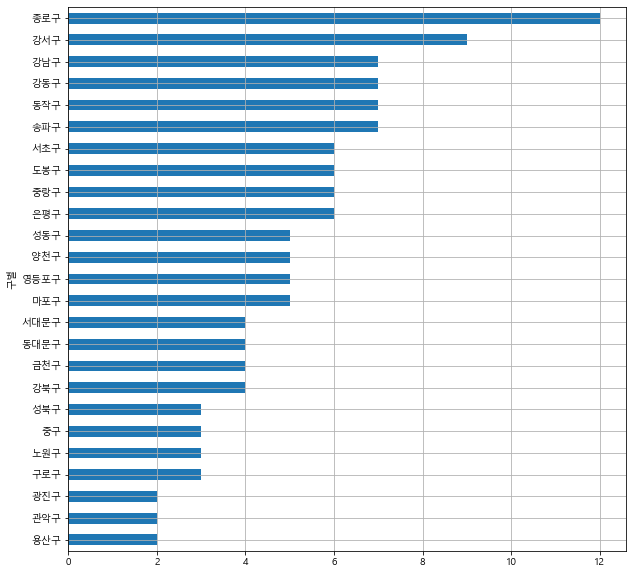

In [441]:
#1. 공원수와 구 : 구별 공원수가 가장 많은 순서  : 단순 숫자로는 종로구,강서,강남이 많다
p['공원수'].sort_values().plot(kind ='barh',grid=True, figsize=(10,10))
plt.show()

In [442]:
#인구수와 공원수의 관계를 보자
fp1 = np.polyfit(p['인구수'],p['공원수'],1)
fp1

array([2.03842835e-06, 4.26846017e+00])

In [443]:
fx= np.array([100000,700000])
f1=np.poly1d(fp1)
fy=f1(fx)
fy

array([4.47230301, 5.69536002])

In [444]:
p['오차'] = np.abs(p['공원수'] - f1(p['인구수']))
p_sort = p.sort_values('오차', ascending=False)
p_sort.head()

,인구수,공원수,공원면적,구면적,오차
구별,,,,,
종로구,159842,12,3907680.57,23.91,7.405713
강서구,589536,9,2194154.10,41.44,3.529813
관악구,514555,2,10431453.08,29.57,3.317344
광진구,361923,2,584002.00,17.06,3.006214
용산구,244953,2,247194.10,21.87,2.767779


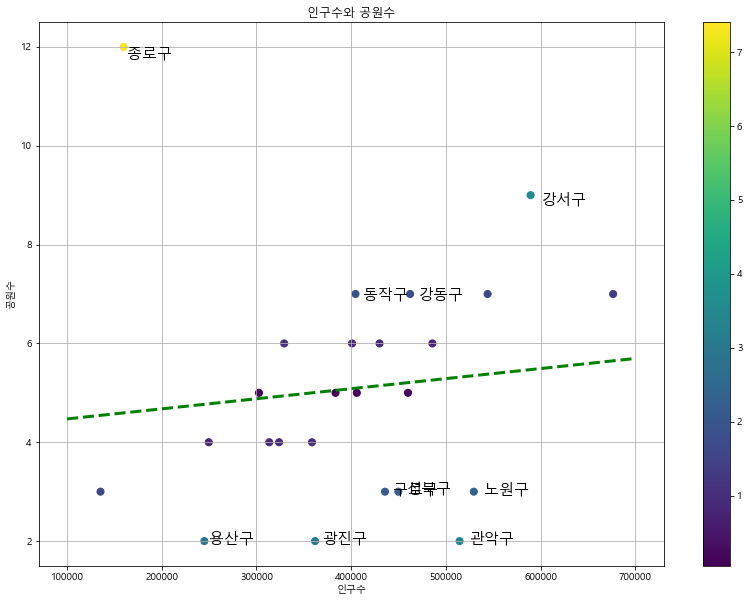

In [445]:
plt.figure(figsize=(14,10))
plt.plot(fx,fy,ls='dashed',lw=3,color='g')
plt.scatter(p['인구수'],p['공원수'],c= p['오차'], s=50)

for n in range(10):
    plt.text(p_sort['인구수'][n]* 1.02, p_sort['공원수'][n]* 0.98,
             p_sort.index[n], fontsize=15)

plt.grid(True)
plt.title('인구수와 공원수')

plt.xlabel('인구수')
plt.ylabel('공원수')

plt.colorbar()
plt.show()

In [446]:
#2. 공원면적과 구 인구 : 인구대비 공원면적비율
p['인구대비공원면적'] = p['공원면적'] / p['인구수']
p.sort_values(by='인구대비공원면적', ascending=False).head()

,인구수,공원수,공원면적,구면적,오차,인구대비공원면적
구별,,,,,,
서초구,429995,6,13359636.00,46.98,0.855026,31.069282
종로구,159842,12,3907680.57,23.91,7.405713,24.447145
노원구,529532,3,12235699.30,35.44,2.347873,23.106629
중구,135321,3,2943303.80,9.96,1.544302,21.750532
관악구,514555,2,10431453.08,29.57,3.317344,20.272766


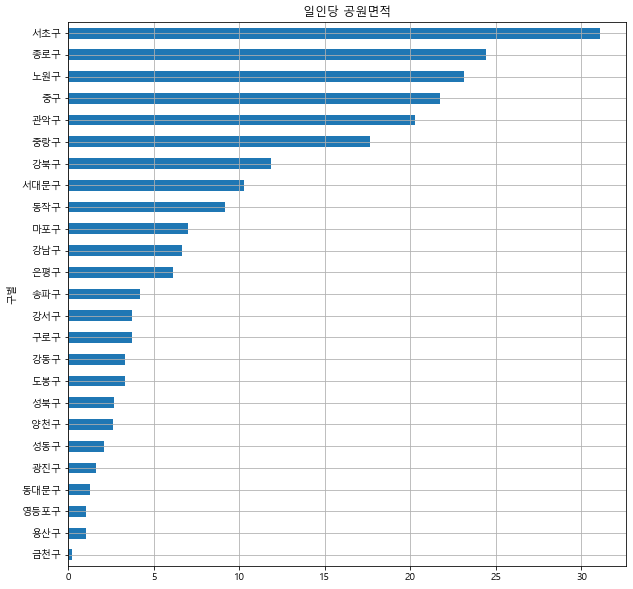

In [447]:
p['인구대비공원면적'].sort_values().plot(kind ='barh',grid=True, figsize=(10,10))

plt.title('일인당 공원면적')
plt.show()
#서초구, 종로구가 일인당 공원면적이 넓게 나타나므로 쾌적하다고 할 수있다? 

In [448]:
#3.공원면적과 구면적 비교 :어느구가 (구 대비)공원의 면적이 실제적으로 넓은가?

In [449]:
fp1 =np.polyfit(p['구면적'], p['공원면적'], 1)
fp1

array([  223419.04664711, -2046497.14170783])

In [450]:
f1 = np.poly1d(fp1)
fx = np.linspace(10, 50, 100)
fy = f1(fx)

In [451]:
p['오차'] = np.abs(p['공원면적'] - f1(p['구면적']))
p_sort1 = p.sort_values('오차', ascending=False)
p_sort1.head()

,인구수,공원수,공원면적,구면적,오차,인구대비공원면적
구별,,,,,,
노원구,529532,3,12235699.30,35.44,6.364225e+06,23.106629
관악구,514555,2,10431453.08,29.57,5.871449e+06,20.272766
강서구,589536,9,2194154.10,41.44,5.017834e+06,3.721832
중랑구,400989,6,7078975.00,18.50,4.992220e+06,17.653789
서초구,429995,6,13359636.00,46.98,4.909906e+06,31.069282


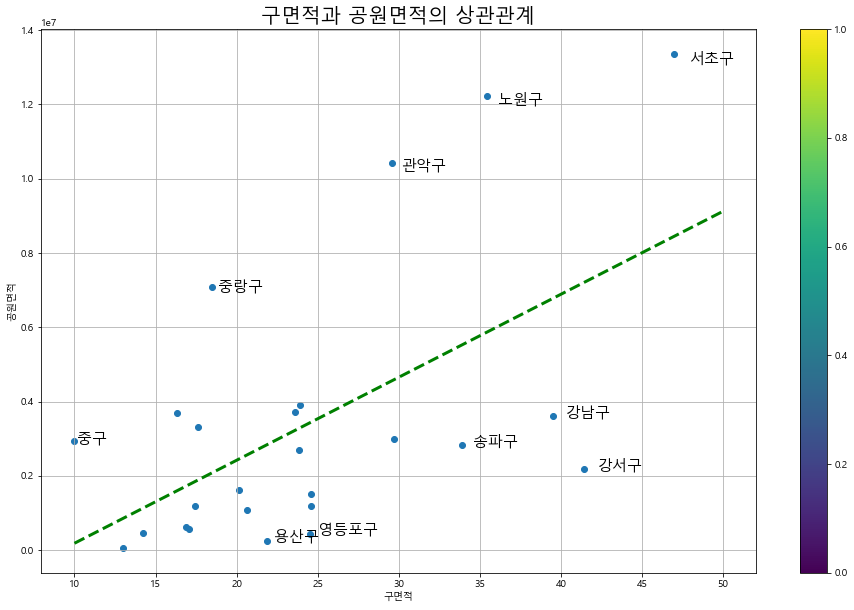

In [452]:

plt.figure(figsize=(16,10))
plt.scatter(p['구면적'], p['공원면적'])
plt.grid(True)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
for i in range(10): 
    plt.text(p_sort1['구면적'][i]*1.02, p_sort1['공원면적'][i]*0.98,
             p_sort1.index[i], fontsize=15)
plt.title('구면적과 공원면적의 상관관계', fontsize=20)
plt.xlabel('구면적')
plt.ylabel('공원면적')
plt.colorbar()    
plt.show()

In [453]:

#p['구면적'] = p['구면적'] * 1000000
p.head()

,인구수,공원수,공원면적,구면적,오차,인구대비공원면적
구별,,,,,,
강남구,544085,7,3626398.50,39.50,3.152157e+06,6.665132
강동구,462275,7,1526389.30,24.59,1.920988e+06,3.301908
강북구,313550,4,3714902.40,23.60,4.887100e+05,11.847879
강서구,589536,9,2194154.10,41.44,5.017834e+06,3.721832
관악구,514555,2,10431453.08,29.57,5.871449e+06,20.272766


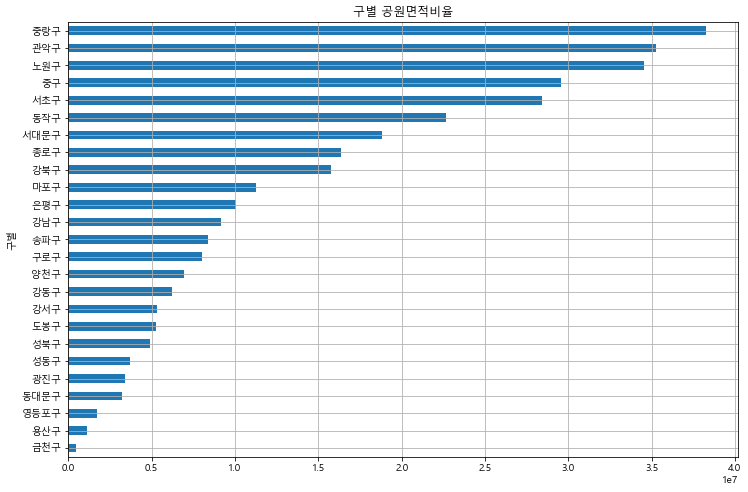

In [454]:
p['공원면적비율'] = p['공원면적'] / p['구면적'] * 100
p['공원면적비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 공원면적비율')
plt.show()

In [455]:
#중랑 관악 노원이 구의 면적에 비해 많은 지역을 공원으로 가지고 있다.

In [456]:
import folium
import json
geo_str = json.load(open('./data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [457]:

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = p['공원면적비율'],
               columns = [p.index, p['공원면적비율']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in park.index:
    folium.CircleMarker([park.lat[i], park.lng[i]],                         
                        tooltip=f"{park['공원명'][i]}",
                        color='green', fill_color='green').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>자치구별 공원면적 비율</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [458]:
# 결론:
# 인구수가 많을수록 공원의 갯수와 많아지고, 면적이 넓어진다.
# 중랑 관악 노원이 구의 면적에 비해 많은 지역을 공원으로 가지고 있다.
# 그러나 인구대비 공원면적을 구해보았을때,,, 서초구,종로구가 높게 나온다. 일인당 공원면적을 넓게가지므로, 쾌적하다고 할수있겠다.. 
# 

In [459]:
#애견인의 비율을 구별로 데이타 분석헤보자.

In [460]:
 dog= pd.read_csv('./data/반려동물여부취득경로.txt',sep='\t',encoding='utf8',header=1)[['대분류','있다']]
 dog.head()

,대분류,있다
0,서울시,20.1
1,성별,18.7
2,성별,23.9
3,연령별,20.4
4,연령별,20.5


In [461]:
i=1
for i in dog.index :
    if i<35: 
        dog.drop([i],inplace=True)   
dog.head()

,대분류,있다
35,종로구,19.9
36,중구,17.4
37,용산구,19.1
38,성동구,18.8
39,광진구,21.6


In [462]:
dog.rename({'대분류':'구별','있다':'반려인비율'}, inplace= True, axis =1)
dog.set_index('구별', inplace=True)
dog.head()

,반려인비율
구별,
종로구,19.9
중구,17.4
용산구,19.1
성동구,18.8
광진구,21.6


In [491]:
dog.sort_values(by='반려인비율',ascending=False )

#반려인이 많은 곳은 영등포구,강남구,동작구로 나타난다.

,반려인비율
구별,
영등포구,24.9
강남구,23.5
동작구,23.0
성북구,22.0
서초구,21.8
광진구,21.6
노원구,21.4
마포구,20.5
구로구,20.5


In [464]:
p['반려인비율'] = dog['반려인비율']

p.head()

,인구수,공원수,공원면적,구면적,오차,인구대비공원면적,공원면적비율,반려인비율
구별,,,,,,,,
강남구,544085,7,3626398.50,39.50,3.152157e+06,6.665132,9.180756e+06,23.5
강동구,462275,7,1526389.30,24.59,1.920988e+06,3.301908,6.207358e+06,20.3
강북구,313550,4,3714902.40,23.60,4.887100e+05,11.847879,1.574111e+07,18.8
강서구,589536,9,2194154.10,41.44,5.017834e+06,3.721832,5.294773e+06,19.8
관악구,514555,2,10431453.08,29.57,5.871449e+06,20.272766,3.527715e+07,17.1


In [490]:
#반려인이 많은 곳은 영등포구,강남구,동작구로 나타난다. 시각화
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = p['반려인비율'],
               columns = [p.index, p['반려인비율']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [465]:
#공원면적비율과 반려인의 비율을 비교해본다. 반려인들의 산책하기 좋은 곳에 살고있는가?

In [466]:
np.corrcoef(p['공원면적비율'],p['반려인비율']) #--> 음의 상관관계 

array([[ 1.        , -0.18475127],
       [-0.18475127,  1.        ]])

In [467]:
fp1 =np.polyfit(p['공원면적비율'], p['반려인비율'], 1)
fp1

array([-3.14657116e-08,  2.04698009e+01])

In [486]:
f1 = np.poly1d(fp1)
fx = np.linspace(50000, 50000000)
fy = f1(fx)

In [496]:
p['오차'] = np.abs(p['반려인비율'] - f1(p['공원면적비율']))
p_sort1 = p.sort_values('오차', ascending=False)
p_sort1

,인구수,공원수,공원면적,구면적,오차,인구대비공원면적,공원면적비율,반려인비율
구별,,,,,,,,
영등포구,405982,5,424446.00,24.55,4.484600,1.045480,1.728904e+06,24.9
강남구,544085,7,3626398.50,39.50,3.319078,6.665132,9.180756e+06,23.5
동작구,404617,7,3706739.10,16.35,3.243564,9.161106,2.267119e+07,23.0
양천구,460048,5,1203428.50,17.41,2.852301,2.615876,6.912283e+06,17.4
은평구,485842,6,2986459.00,29.71,2.553506,6.146976,1.005203e+07,17.6
관악구,514555,2,10431453.08,29.57,2.259780,20.272766,3.527715e+07,17.1
서초구,429995,6,13359636.00,46.98,2.224985,31.069282,2.843686e+07,21.8
서대문구,323860,4,3321476.60,17.63,2.176990,10.255903,1.883991e+07,17.7
중구,135321,3,2943303.80,9.96,2.139950,21.750532,2.955124e+07,17.4


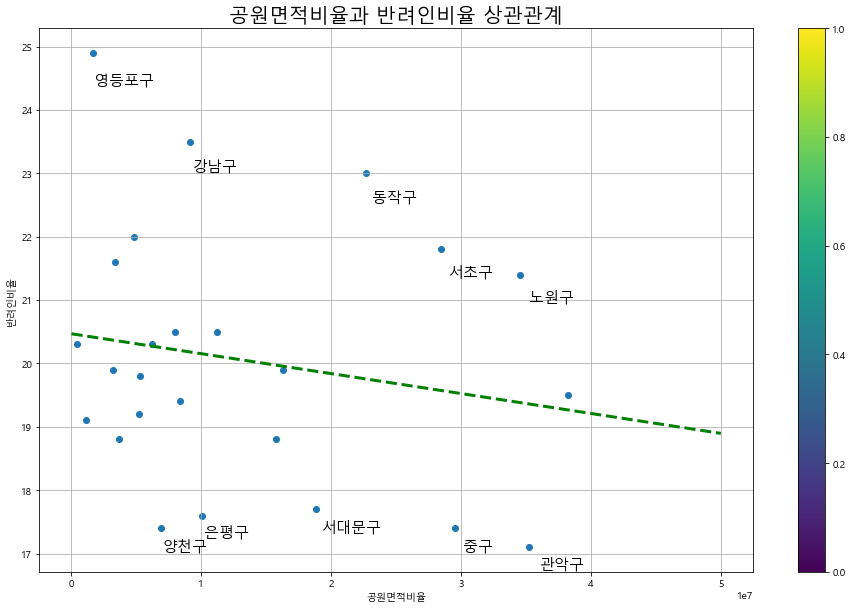

In [488]:
plt.figure(figsize=(16,10))
plt.scatter(p['공원면적비율'], p['반려인비율'])
plt.grid(True)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
for i in range(10): 
    plt.text(p_sort1['공원면적비율'][i]*1.02, p_sort1['반려인비율'][i]*0.98,
             p_sort1.index[i], fontsize=15)
plt.title('공원면적비율과 반려인비율 상관관계', fontsize=20)
plt.xlabel('공원면적비율')
plt.ylabel('반려인비율')
plt.colorbar()    
plt.show()

In [471]:
#공원면적비율대비 인구수와 반려인 비율 비교
#음의 상관관계를 보이고 있다. 반려인들이 많으나,공원이 적은 영등포(best)와 강남구(땅값이 비싸니까....),성북구,광진구쪽에 공원 대용 애견 놀이터를 만드는것이 좋겠다^^ 


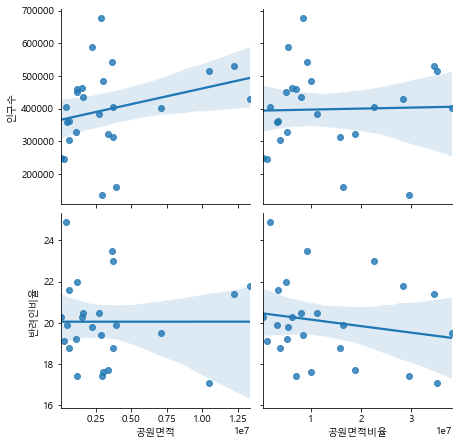

In [489]:
#공원 대비 인구와 반려인의 비교<참고>
sns.pairplot(
    p,
    x_vars=['공원면적','공원면적비율'],
    y_vars=['인구수','반려인비율'],kind='reg',size=3)
plt.show()

In [495]:
#강서구에 공원위치 표시하기
map = folium.Map(location=[37.5509655, 126.849532], zoom_start=13)
gangseogu = park[park['구별'] == '강서구']
for i in gangseogu.index:
    folium.CircleMarker([gangseogu.lat[i], gangseogu.lng[i]], 
                        
                        tooltip=f"{gangseogu['공원명'][i]}",
                        color='#3186cc', fill_color='#3186cc').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>강서구 공원 현황</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [497]:
p.to_csv('./data/result_parkDog.csv', sep=',', encoding='utf8', index=False)